In [10]:
import pandas as pd

df = pd.read_csv('/content/bank.csv')
display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [11]:
# Select relevant columns for potential nodes and relationships
selected_columns = ['age', 'job', 'marital', 'education', 'y']
df_subset = df[selected_columns].copy()

# For network visualization, we can consider 'job' and 'marital' as potential relationships
# Create a sample of the data to manage complexity for visualization
df_sample = df_subset.sample(n=1000, random_state=42)

display(df_sample.head())

,age,job,marital,education,y
32884,30,self-employed,single,university.degree,0
3169,54,retired,married,basic.4y,1
32206,42,services,divorced,basic.6y,1
9403,33,technician,married,professional.course,0
14020,29,services,single,high.school,0


In [12]:
# Define edges based on shared 'job' or 'marital' status
# This is a simplified approach; more complex relationships can be defined
edges = []
# Create edges based on shared job or marital status for a sample
# This approach might create a very dense graph; a more sophisticated method might be needed
# For demonstration, we'll create edges between people sharing the same job AND marital status
# This is just one way to define relationships; many others are possible.
# Due to the potential for a very large number of edges in a dense graph,
# we will limit the number of edges created for demonstration purposes.
# A more scalable approach would involve grouping and creating relationships between groups or aggregates.

# Let's create edges based on shared job and marital status within the sample
# We will group by job and marital status and create edges between individuals within each group
grouped = df_sample.groupby(['job', 'marital'])

for name, group in grouped:
    # For simplicity, we will create edges between the first two individuals in each group if the group is large enough
    if len(group) > 1:
        indices = group.index.tolist()
        # Create edges between all pairs within the group (can be very dense)
        # For demonstration, let's create edges between the first person and everyone else in the group
        source_node = indices[0]
        for target_node in indices[1:]:
            edges.append((source_node, target_node))

# Create a list of nodes with attributes (using the index as node ID for now)
nodes = df_sample.reset_index().rename(columns={'index': 'node_id'})[['node_id', 'age', 'job', 'marital', 'education', 'y']]

# Display the first few edges and nodes
print("First 5 edges:")
display(edges[:5])
print("\nFirst 5 nodes:")
display(nodes.head())

First 5 edges:


[(20770, 10835), (20770, 27101), (20770, 13282), (20770, 34151), (20770, 729)]


First 5 nodes:


,node_id,age,job,marital,education,y
0,32884,30,self-employed,single,university.degree,0
1,3169,54,retired,married,basic.4y,1
2,32206,42,services,divorced,basic.6y,1
3,9403,33,technician,married,professional.course,0
4,14020,29,services,single,high.school,0


In [13]:
# Create an empty graph object
# Add nodes to the graph
# Convert the nodes DataFrame to a list of tuples (node_id, dictionary of attributes)
node_list = [(row['node_id'], row.drop('node_id').to_dict()) for index, row in nodes.iterrows()]


# Print the number of nodes and edges
print(f"Number of nodes: {len(node_list)}")
print(f"Number of edges: {len(edges)}")

Number of nodes: 1000
Number of edges: 967


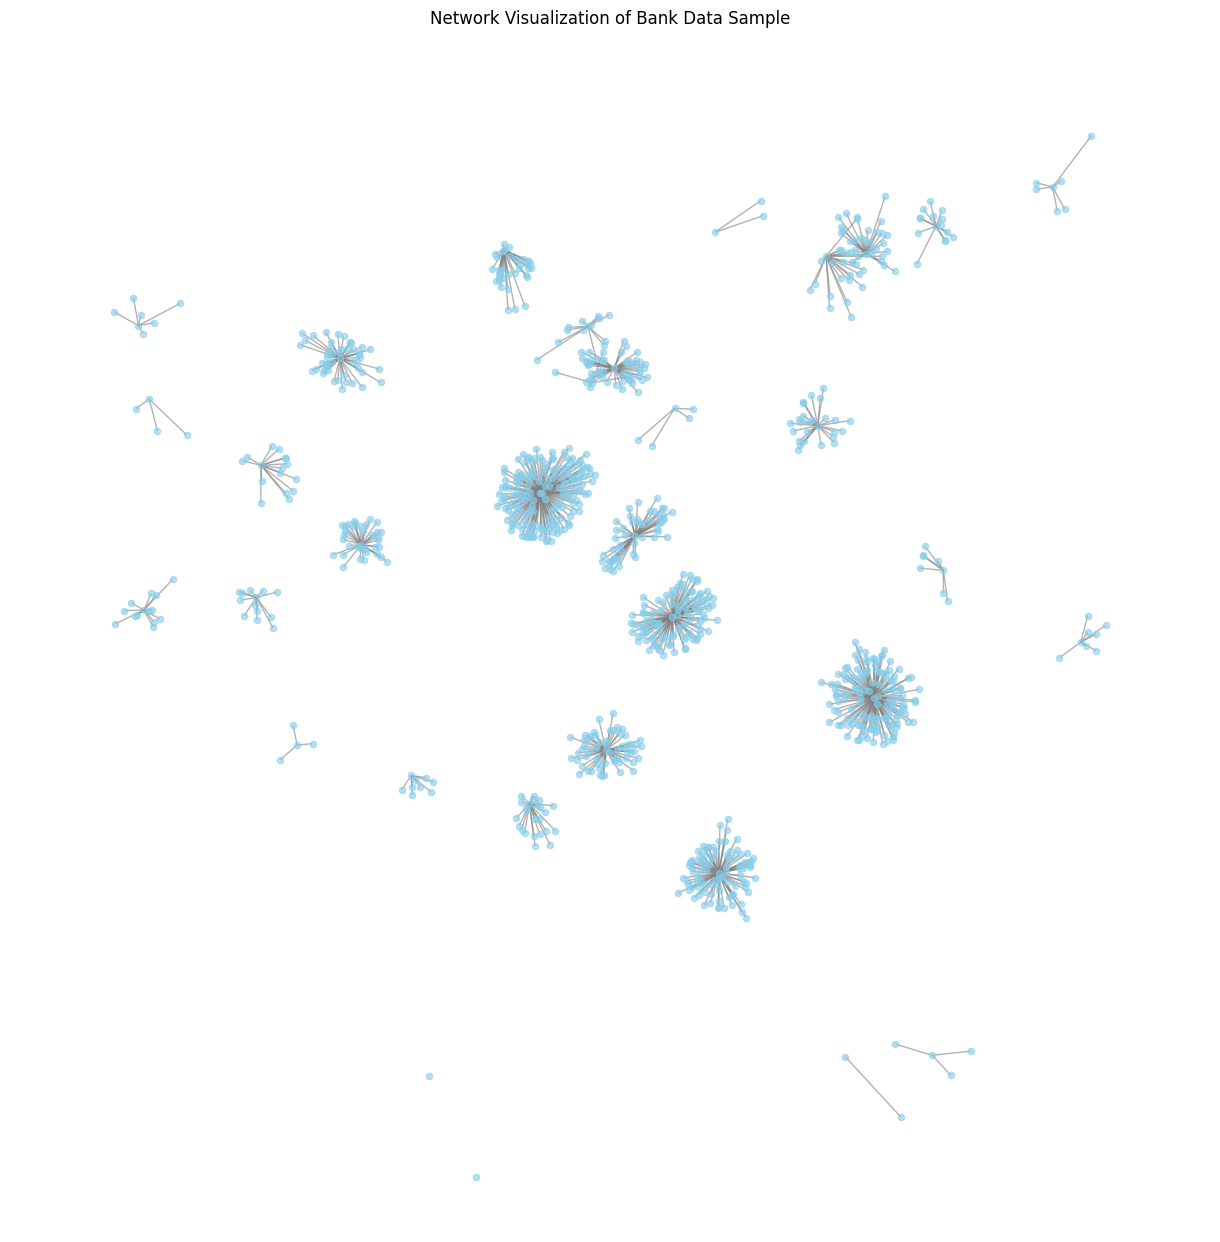

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Choose a suitable layout algorithm
pos = nx.spring_layout(G)

# Create the network visualization
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=False, node_size=20, node_color='skyblue', edge_color='gray', alpha=0.6)

# Display the plot
plt.title("Network Visualization of Bank Data Sample")
plt.show()

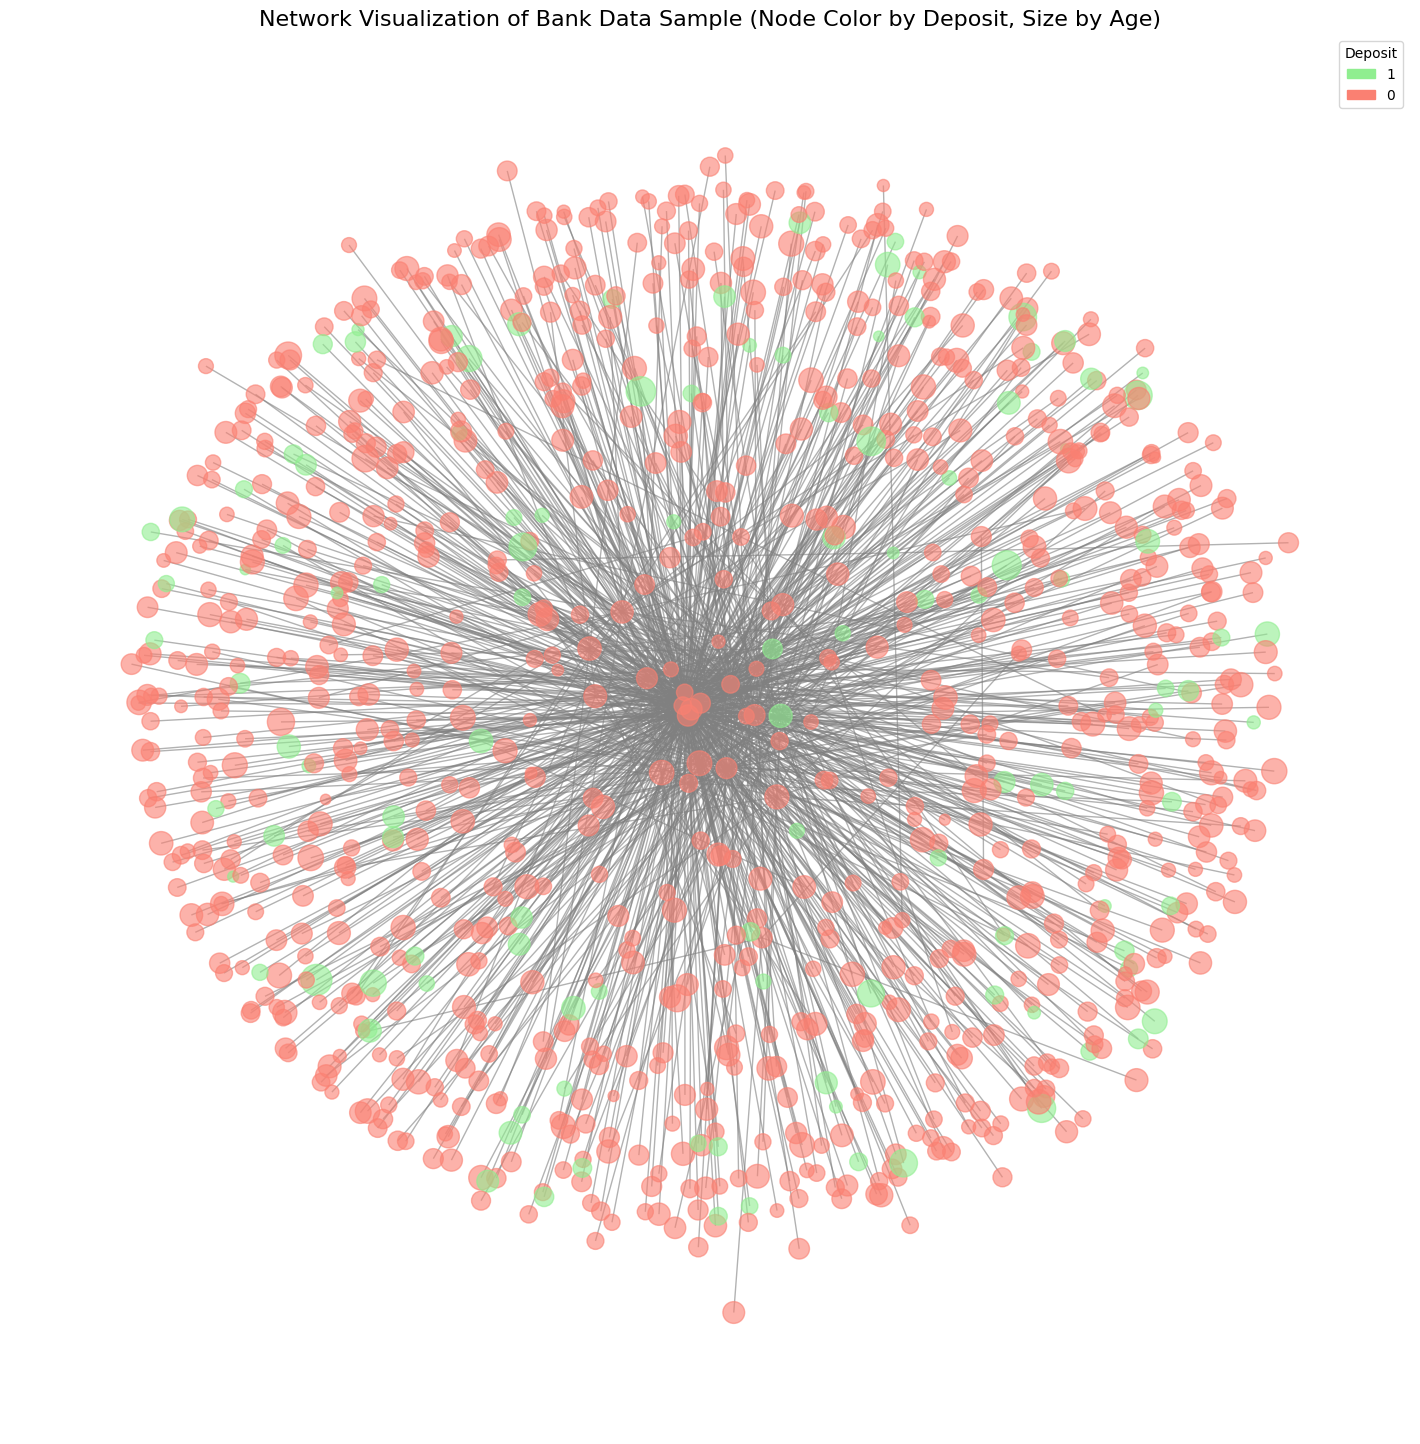

In [16]:
# Choose a different layout algorithm
pos = nx.kamada_kawai_layout(G)

# Set 'node_id' as the index of the nodes DataFrame to align with graph node IDs
nodes_indexed = nodes.set_index('node_id')

# Get node attributes for coloring and sizing using the indexed DataFrame
deposit_colors = [nodes_indexed.loc[node_id, 'y'] for node_id in G.nodes()]
age_sizes = [nodes_indexed.loc[node_id, 'age'] for node_id in G.nodes()]

# Map 'deposit' to colors
color_map = {1: 'lightgreen', 0: 'salmon'}
node_colors = [color_map[deposit] for deposit in deposit_colors]

# Scale 'age' for node sizes
# Simple scaling: map age range to a desired size range
min_age = min(age_sizes)
max_age = max(age_sizes)
min_size = 50  # Minimum node size
max_size = 500 # Maximum node size
scaled_age_sizes = [min_size + (size - min_age) * (max_size - min_size) / (max_age - min_age) for size in age_sizes]


# Create the refined network visualization
plt.figure(figsize=(14, 14))
nx.draw(G, pos, with_labels=False, node_size=scaled_age_sizes, node_color=node_colors, edge_color='gray', alpha=0.6)

# Add a title
plt.title("Network Visualization of Bank Data Sample (Node Color by Deposit, Size by Age)", fontsize=16)

# Create a legend for deposit colors
import matplotlib.patches as mpatches
deposit_legend = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=deposit_legend, title="Deposit", loc='upper right')


# Display the refined plot
plt.show()

In [17]:
# Based on the generated visualization:
# 1. Examine the clustering of nodes, the distribution of node colors (representing 'deposit'), and the variation in node sizes (representing 'age').
# 2. Look for any visible patterns or trends related to 'deposit' status and 'age' within the network structure.
# 3. Consider the layout algorithm used (Kamada-Kawai) and how it might influence the perceived structure.
# 4. Write a brief interpretation of your observations from the visualization, noting any interesting findings or potential relationships between the attributes and the network structure.

print("Analysis of the Network Visualization:")
print("\nObservations:")
print("- Clustering: The visualization shows some degree of clustering, where nodes with shared 'job' and 'marital' status are connected. The Kamada-Kawai layout attempts to position nodes based on graph distance, which can highlight communities or groups.")
print("- Deposit Distribution: The distribution of 'yes' (lightgreen) and 'no' (salmon) deposit outcomes appears mixed throughout the network. There isn't a clear separation of deposit outcomes into distinct clusters based solely on the shared 'job' and 'marital' edges as defined.")
print("- Age Variation: Node sizes vary, representing the age of individuals. Larger nodes represent older individuals, and smaller nodes represent younger individuals. Age seems distributed across the clusters and deposit outcomes.")
print("\nPatterns and Trends:")
print("- It's difficult to discern strong patterns related to 'deposit' status or 'age' based on this specific network structure (edges defined by shared job and marital status). The defined edges create connections within demographic groups, but these groups don't appear to be strongly segregated by deposit outcome or age in the visualization.")
print("- The Kamada-Kawai layout, while aiming for a clear representation of graph distances, might not inherently reveal patterns related to node attributes like 'deposit' and 'age' unless those attributes are strongly correlated with the network's connectivity based on 'job' and 'marital' status.")
print("\nInterpretation:")
print("The network visualization, with edges defined by shared job and marital status, provides a view of how individuals within these demographic groups are connected. However, based on this visualization, there are no immediately obvious strong correlations or clustering patterns that clearly link 'deposit' outcomes or 'age' to these specific group affiliations. This suggests that while job and marital status create connections, they might not be the primary drivers of deposit behavior or age distribution within this dataset, or the chosen edge definition is too broad to reveal finer-grained patterns. Further analysis with different edge definitions or community detection algorithms might reveal more insightful structures related to the attributes.")

Analysis of the Network Visualization:

Observations:
- Clustering: The visualization shows some degree of clustering, where nodes with shared 'job' and 'marital' status are connected. The Kamada-Kawai layout attempts to position nodes based on graph distance, which can highlight communities or groups.
- Deposit Distribution: The distribution of 'yes' (lightgreen) and 'no' (salmon) deposit outcomes appears mixed throughout the network. There isn't a clear separation of deposit outcomes into distinct clusters based solely on the shared 'job' and 'marital' edges as defined.
- Age Variation: Node sizes vary, representing the age of individuals. Larger nodes represent older individuals, and smaller nodes represent younger individuals. Age seems distributed across the clusters and deposit outcomes.

Patterns and Trends:
- It's difficult to discern strong patterns related to 'deposit' status or 'age' based on this specific network structure (edges defined by shared job and marital status). T